In [1]:
from surprise import Dataset 
from surprise import Reader 
import os



In [2]:
#load data from a file

file_path = os.path.expanduser('/Users/juliaarroyo/Documents/MachineLearning/restaurant_ratings.txt')

reader = Reader(line_format='user item rating timestamp', sep='\t') 
data = Dataset.load_from_file(file_path, reader=reader)


In [4]:
#SVD Algorithm
from surprise import SVD 
from surprise import Dataset
from surprise import evaluate, print_perf
import os
from surprise import Reader

 
#load data from a file

file_path = os.path.expanduser('/Users/juliaarroyo/Documents/MachineLearning/restaurant_ratings.txt')

reader = Reader(line_format='user item rating timestamp', sep='\t')

data = Dataset.load_from_file(file_path, reader=reader)

data.split(n_folds=3)

algo = SVD()

perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9453
MAE:  0.7461
------------
Fold 2
RMSE: 0.9399
MAE:  0.7426
------------
Fold 3
RMSE: 0.9474
MAE:  0.7460
------------
------------
Mean RMSE: 0.9442
Mean MAE : 0.7449
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9453  0.9399  0.9474  0.9442  
MAE     0.7461  0.7426  0.7460  0.7449  


In [7]:
#PMF Algorithm(same as unbiased version of SVD)

from surprise import SVD 
from surprise import Dataset
from surprise import evaluate, print_perf 
import os
from surprise import Reader

#load data from a file

file_path = os.path.expanduser('/Users/juliaarroyo/Documents/MachineLearning/restaurant_ratings.txt')

reader = Reader(line_format='user item rating timestamp', sep='\t') 
data = Dataset.load_from_file(file_path, reader=reader)

data.split(n_folds=3)

algo = SVD(biased=False) #PMF

perf = evaluate(algo, data, measures=['RMSE', 'MAE']) 
print_perf(perf)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9567
MAE:  0.7566
------------
Fold 2
RMSE: 0.9475
MAE:  0.7493
------------
Fold 3
RMSE: 0.9565
MAE:  0.7555
------------
------------
Mean RMSE: 0.9536
Mean MAE : 0.7538
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9567  0.9475  0.9565  0.9536  
MAE     0.7566  0.7493  0.7555  0.7538  


In [9]:
#NMF algorithm
from surprise import Dataset
from surprise import NMF

from surprise import evaluate, print_perf

import os

from surprise import Reader

#load data from a file

file_path = os.path.expanduser('/Users/juliaarroyo/Documents/MachineLearning/restaurant_ratings.txt')

reader = Reader(line_format='user item rating timestamp', sep='\t')

data = Dataset.load_from_file(file_path, reader=reader)

data.split(n_folds=3)

algo = NMF()

perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)


Evaluating RMSE, MAE of algorithm NMF.

------------
Fold 1
RMSE: 0.9754
MAE:  0.7649
------------
Fold 2
RMSE: 0.9735
MAE:  0.7653
------------
Fold 3
RMSE: 0.9732
MAE:  0.7654
------------
------------
Mean RMSE: 0.9740
Mean MAE : 0.7652
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9754  0.9735  0.9732  0.9740  
MAE     0.7649  0.7653  0.7654  0.7652  


In [10]:
#User Based Collaborative Filtering Algorithm
from surprise import KNNBasic 
from surprise import Dataset
from surprise import evaluate, print_perf 
from surprise import Reader
import os

#load data from a file

file_path = os.path.expanduser('/Users/juliaarroyo/Documents/MachineLearning/restaurant_ratings.txt')

reader = Reader(line_format='user item rating timestamp', sep='\t') 
data = Dataset.load_from_file(file_path, reader=reader)

data.split(n_folds=3)

algo = KNNBasic(sim_options = { 'user_based': True })

perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9904
MAE:  0.7838
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9829
MAE:  0.7756
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9891
MAE:  0.7826
------------
------------
Mean RMSE: 0.9875
Mean MAE : 0.7806
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9904  0.9829  0.9891  0.9875  
MAE     0.7838  0.7756  0.7826  0.7806  


In [11]:
#Item based collaborative filtering algorithm
from surprise import KNNBasic 
from surprise import Dataset
from surprise import evaluate, print_perf

import os

from surprise import Reader

#load data from a file

file_path = os.path.expanduser('/Users/juliaarroyo/Documents/MachineLearning/restaurant_ratings.txt')

reader = Reader(line_format='user item rating timestamp', sep='\t') 
data = Dataset.load_from_file(file_path, reader=reader)

data.split(n_folds=3)

algo = KNNBasic(sim_options = { 'user_based': False})

perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print_perf(perf)


Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9836
MAE:  0.7799
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9914
MAE:  0.7826
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9809
MAE:  0.7772
------------
------------
Mean RMSE: 0.9853
Mean MAE : 0.7799
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9836  0.9914  0.9809  0.9853  
MAE     0.7799  0.7826  0.7772  0.7799  


In [12]:
#Comparing all algorithms

#SVD
file_path = os.path.expanduser('/Users/juliaarroyo/Documents/MachineLearning/restaurant_ratings.txt')

reader = Reader(line_format='user item rating timestamp', sep='\t')

data = Dataset.load_from_file(file_path, reader=reader)


data.split(n_folds=3)

algo = SVD()

perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9398
MAE:  0.7427
------------
Fold 2
RMSE: 0.9462
MAE:  0.7469
------------
Fold 3
RMSE: 0.9478
MAE:  0.7452
------------
------------
Mean RMSE: 0.9446
Mean MAE : 0.7449
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9398  0.9462  0.9478  0.9446  
MAE     0.7427  0.7469  0.7452  0.7449  


In [13]:
algo = SVD(biased=False) #PMF

perf = evaluate(algo, data, measures=['RMSE', 'MAE']) 
print_perf(perf)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.9507
MAE:  0.7533
------------
Fold 2
RMSE: 0.9557
MAE:  0.7563
------------
Fold 3
RMSE: 0.9545
MAE:  0.7518
------------
------------
Mean RMSE: 0.9537
Mean MAE : 0.7538
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9507  0.9557  0.9545  0.9537  
MAE     0.7533  0.7563  0.7518  0.7538  


In [61]:
#User based CF
#algo = KNNBasic(sim_options = { 'user_based': True })
#adjusting neighbors
algo = KNNBasic(k = 30, sim_options = {'user_based': True})

perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)


Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9840
MAE:  0.7791
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9880
MAE:  0.7804
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9869
MAE:  0.7790
------------
------------
Mean RMSE: 0.9863
Mean MAE : 0.7795
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9840  0.9880  0.9869  0.9863  
MAE     0.7791  0.7804  0.7790  0.7795  


In [55]:
#Item Based CF
#algo = KNNBasic(sim_options = {'user_based': False})

#adjusting neighbors
algo = KNNBasic(k = 50, sim_options = {'user_based': False})

perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print_perf(perf)
#print(perf)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9893
MAE:  0.7866
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9917
MAE:  0.7858
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9934
MAE:  0.7878
------------
------------
Mean RMSE: 0.9914
Mean MAE : 0.7867
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9893  0.9917  0.9934  0.9914  
MAE     0.7866  0.7858  0.7878  0.7867  


In [16]:
#NMF
algo = NMF()

perf = evaluate(algo, data, measures=['RMSE', 'MAE'])

print_perf(perf)

Evaluating RMSE, MAE of algorithm NMF.

------------
Fold 1
RMSE: 0.9687
MAE:  0.7621
------------
Fold 2
RMSE: 0.9781
MAE:  0.7691
------------
Fold 3
RMSE: 0.9779
MAE:  0.7651
------------
------------
Mean RMSE: 0.9749
Mean MAE : 0.7654
------------
------------
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9687  0.9781  0.9779  0.9749  
MAE     0.7621  0.7691  0.7651  0.7654  


In [18]:
#MSD Similarity in Userbased collaborative filtering:
algo = KNNBasic(sim_options = {'name': 'MSD', 'user_based': True })
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print('MSD Similarity in Userbased collaborative filtering:')
print_perf(perf)
#Cosine similarity in User based Collaborative Filtering:

algo = KNNBasic(sim_options = {'name':'cosine', 'user_based': True })
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print('Cosine similarity in User based Collaborative Filtering:')
print_perf(perf)
#Pearson similarity in User based Collaborative Filtering:

algo = KNNBasic(sim_options = {'name':'pearson', 'user_based': True })
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print('Pearson similarity in User based Collaborative Filtering:')
print_perf(perf)


Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9860
MAE:  0.7811
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9894
MAE:  0.7823
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9887
MAE:  0.7811
------------
------------
Mean RMSE: 0.9880
Mean MAE : 0.7815
------------
------------
MSD Similarity in Userbased collaborative filtering:
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9860  0.9894  0.9887  0.9880  
MAE     0.7811  0.7823  0.7811  0.7815  
Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0196
MAE:  0.8091
------------
Fold 2
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0221
MAE:  0.8098
------------
Fold 3
Computing the cosine simi

In [20]:
#MSD Similarity in Item based collaborative filtering:
algo = KNNBasic(sim_options = {'name':'MSD', 'user_based': False })
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print('MSD Similarity in Item based collaborative filtering:')
print_perf(perf)
#Cosine similarity in User based Collaborative Filtering:

algo = KNNBasic(sim_options = {'name':'cosine', 'user_based': False })
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print('Cosine Similarity in Item based collaborative filtering:')
print_perf(perf)
#Pearson similarity in User based Collaborative Filtering:

algo = KNNBasic(sim_options = {'name':'pearson', 'user_based': False })
perf = evaluate(algo, data, measures=['RMSE', 'MAE'])
print('Pearson Similarity in Item based collaborative filtering:')
print_perf(perf)

Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9834
MAE:  0.7798
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9867
MAE:  0.7808
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9885
MAE:  0.7826
------------
------------
Mean RMSE: 0.9862
Mean MAE : 0.7811
------------
------------
MSD Similarity in Item based collaborative filtering:
        Fold 1  Fold 2  Fold 3  Mean    
RMSE    0.9834  0.9867  0.9885  0.9862  
MAE     0.7798  0.7808  0.7826  0.7811  
Evaluating RMSE, MAE of algorithm KNNBasic.

------------
Fold 1
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0360
MAE:  0.8228
------------
Fold 2
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0353
MAE:  0.8213
------------
Fold 3
Computing the cosine sim

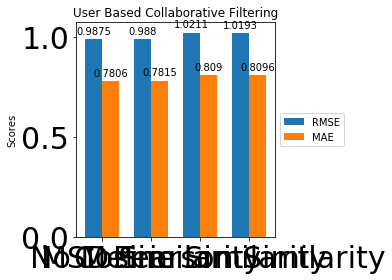

In [45]:
#Plotting User Based Metrics
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['No Metric', 'MSD Similarity', 'Cosine Similarity', 'Pearson Similarity']
RMSE_means = [.9875, .9880, 1.0211, 1.0193]
MAE_means = [.7806, .7815, .8090, .8096]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, RMSE_means, width, label='RMSE')
rects2 = ax.bar(x + width/2, MAE_means, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('User Based Collaborative Filtering')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

In [ ]:
#Plotting Item Based Metrics
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['No Metric', 'MSD Sim.', 'Cosine Sim.', 'Pearson Sim.']
RMSE_means = [.9853, .9862, 1.0368, 1.0495]
MAE_means = [.7799, .7811, .8231, .8399]

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, RMSE_means, width, label='RMSE')
rects2 = ax.bar(x + width/2, MAE_means, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Values')
ax.set_title('Item Based Collaborative Filtering')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

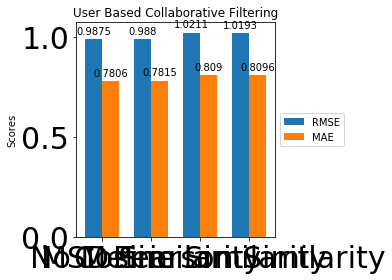

In [44]:
#Plotting Item Based With Neighbors
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['0', '5', '10', '20', '50']
ItemBased = [1.1257, 1.0859, 1.0250, 0.9948, 0.9873]
UserBased = [1.1257, 1.0378, 1.0004, 0.9866, 0.9901]

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ItemBased, width, label='Item Based')
rects2 = ax.bar(x + width/2, UserBased, width, label='User Based')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean RMSE Values')
ax.set_xlabel('Number of Neighbors')
ax.set_title('Collaborative Filtering')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()